In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Data Preparation

In [40]:
df = pd.read_csv(r"G:\My Drive\4b - Courses\9 - Data Science\Datasets\ALL CSV FILES - 2nd Edition\Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [41]:
df.shape

(200, 5)

### Drop Duplicate Column

In [42]:
df.drop(('Unnamed: 0'),axis=1,inplace=True)

### Check for Multiple Collinearity

In [43]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


## Multiple Linear Regression

In [9]:
df
X = df[["TV","radio","newspaper"]].values[:int(0.8*len(df)),:]
Xtest = df[["TV","radio","newspaper"]].values[int(0.8*len(df)):,:]
y = df.sales.values[:int(0.8*len(df))]
ytest = df.sales.values[int(0.8*len(df)):]


In [44]:
from sklearn.model_selection import train_test_split
X = df[["TV","radio","newspaper"]]
y = df.sales.values
Xtest, Xtrain, ytest, ytrain = train_test_split(X,y,test_size=0.8, random_state=2)

### Feature Statistical Importance

In [45]:
from scipy import stats 
dg = pd.DataFrame(columns=["r-sq","P value"])

for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):# and col != "sales":
        r, p = stats.pearsonr(df[col],df.sales)
        dg.loc[col] = [round(r,4), round(p,4)]
dg 
    


,r-sq,P value
TV,0.7822,0.0000
radio,0.5762,0.0000
newspaper,0.2283,0.0011
sales,1.0000,0.0000


### Multiple Linear Regression Fitting

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

regr = LinearRegression().fit(X,y)
print(f"coefficients: {regr.coef_}")
print(f"intercept: {regr.intercept_}")
print(f"r-square: {regr.score(X,y)}")
ypred = regr.predict(Xtest)
print(f"Validation r-square: {r2_score(ytest,ypred)}")

coefficients: [ 0.0472521   0.179922   -0.00094408]
intercept: 2.949011040582109
r-square: 0.8961523241120161
Validation r-square: 0.8954782879224387


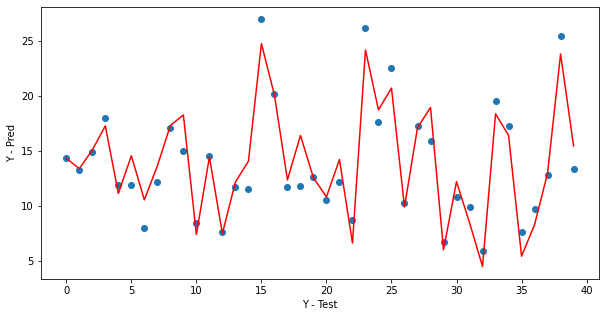

In [12]:
plt.figure(figsize=[10,5])
plt.plot(ytest,'o', ypred,'-r')
plt.xlabel("Y - Test"), plt.ylabel("Y - Pred")
plt.show()

## Multiple Polynomial Regression 

Splitting into Train, Test and Validation Data

In [13]:
from sklearn.model_selection import train_test_split
X = df[["TV","radio","newspaper"]].values
y = df.sales.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size= 0.2)
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain,ytrain, test_size= 0.25)
 

In [14]:
X = df[["TV","radio","newspaper"]].values[:int(0.8*len(df)),:]
Xtest = df[["TV","radio","newspaper"]].values[int(0.8*len(df)):,:]
y = df.sales.values[:int(0.8*len(df))]
ytest = df.sales.values[int(0.8*len(df)):]

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, include_bias=False)
X_ = poly.fit_transform(X)
reg = LinearRegression().fit(X_,y)
print(f" r-square: {reg.score(X_,y)}")
print(f"coefficients: {reg.coef_}")
print(f"intercept: {reg.intercept_}") 

 r-square: 0.9844977762775055
coefficients: [ 5.44392975e-02  1.98805461e-02  1.17158159e-02 -1.17338329e-04
  1.10186153e-03 -5.85513540e-05  1.11997392e-04  6.67494227e-05
 -9.30004044e-06]
intercept: 4.8899033973453765


validation r-square: 0.9937469119902831


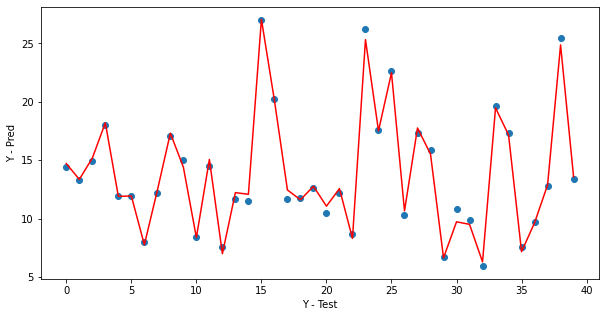

In [16]:
yppred = reg.predict(poly.fit_transform(Xtest))
print(f"validation r-square: {r2_score(ytest,yppred)}")
plt.figure(figsize=[10,5])
plt.plot(ytest,'o',yppred,'r')
plt.xlabel("Y - Test"), plt.ylabel("Y - Pred")
plt.show()

P test on Polynomial variables
```
q = pd.DataFrame(X_)
dh = pd.DataFrame(columns=["r-square","P value"])
for col in q:
    if pd.api.types.is_numeric_dtype(q[col]):
        r, p = stats.pearsonr(q[col],df.sales)
        dh.loc[col] = [round(r,4),round(p,4)]
dh
```

## Individual Contributions

### Using Scipy.Stats.Linregress

In [17]:
TV = df.TV.values
Radio = df.radio.values
Newspaper = df.newspaper.values
y = df.sales.values

#### TV

In [18]:
# TV
slopet, interceptt, r, p, std_error = stats.linregress(TV, y)

def TV_model(x):
    return slopet*x + interceptt

y_TV_sales = list(map(TV_model,TV))
print(f"TV r-square: {r}")
print(f"TV P value: {p:.4f}")

TV r-square: 0.7822244248616065
TV P value: 0.0000


#### Radio

In [19]:
# Radio
slope, intercept, r, p, std_error = stats.linregress(Radio, y)

def Radio_model(x):
    return slope*x + intercept

y_Radio_sales = list(map(Radio_model,Radio))

print(f"Radio r-square: {r}")
print(f"Radio P value: {p:.4f}")

Radio r-square: 0.5762225745710553
Radio P value: 0.0000


#### Newspaper

In [20]:
# Newspaper
slope, intercept, r, p, std_error = stats.linregress(Newspaper, y)

def Newspaper_model(x):
    return slope*x + intercept

y_Newspaper_sales = list(map(Newspaper_model,Newspaper))
print(f"Newspaper r-square: {r}")
print(f"Newspaper P value: {p:.4f}")

Newspaper r-square: 0.22829902637616536
Newspaper P value: 0.0011


### Using Scipy.Stats.Pearsonr

In [21]:
dg = pd.DataFrame(columns=["r-square","P value"])
for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        r, p = stats.pearsonr(df[col],df.sales)
        dg.loc[col] = [round(r,4),round(p,4)]
dg

,r-square,P value
TV,0.7822,0.0000
radio,0.5762,0.0000
newspaper,0.2283,0.0011
sales,1.0000,0.0000


### Plotting

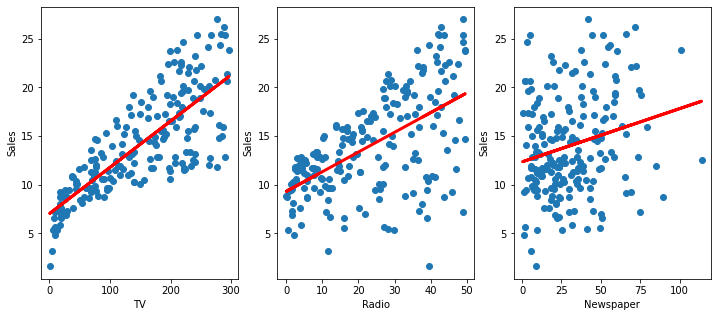

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.scatter(data=df,x='TV',y='sales')
plt.plot(TV,y_TV_sales, c='r',lw=3)
plt.ylabel("Sales"), plt.xlabel("TV")
plt.subplot(1,3,2)
plt.scatter(data=df,x='radio',y='sales',marker='o')
plt.plot(Radio,y_Radio_sales, c='r',lw=3)
plt.ylabel("Sales"), plt.xlabel("Radio")
plt.subplot(1,3,3)
plt.scatter(data=df,x='newspaper',y='sales')
plt.plot(Newspaper,y_Newspaper_sales, c='r',lw=3)
plt.ylabel("Sales"), plt.xlabel("Newspaper")
plt.show()

## Using polynomial regression

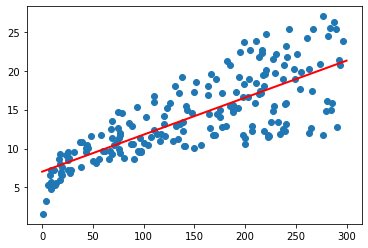

In [23]:
TV_model1 = np.poly1d(np.polyfit(TV,y,1))
TVx = np.linspace(0,300,200)
plt.scatter(data=df,x='TV',y='sales')
plt.plot(TVx, TV_model1(TVx), c='r',lw=2)
plt.show()

In [24]:
from sklearn.metrics import r2_score
r2_score(y,TV_model(TV))

0.611875050850071

### Test

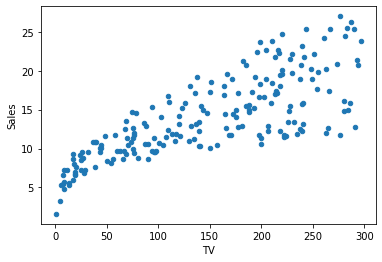

In [25]:
df.plot(x='TV',y='sales',kind='scatter',xlabel='TV',ylabel='Sales')
plt.show()

In [26]:
type(df[['TV']])

pandas.core.frame.DataFrame

In [27]:
df.groupby(by='TV').mean()

,radio,newspaper,sales
TV,,,
0.7,39.6,8.7,1.6
4.1,11.6,5.7,3.2
5.4,29.9,9.4,5.3
7.3,28.1,41.4,5.5
7.8,38.9,50.6,6.6
...,...,...,...
289.7,42.3,51.2,25.4
290.7,4.1,8.5,12.8
292.9,28.3,43.2,21.4


### Test

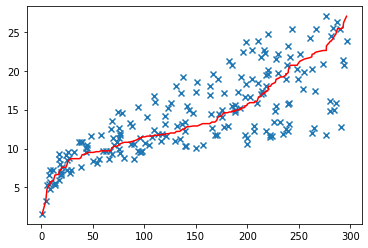

In [28]:
plt.scatter(x=df.TV, y=df.sales, marker='x')
plt.plot(sorted(df.TV),sorted(df.sales),'r')
plt.show()

In [29]:
np.corrcoef(df.TV, df.sales, rowvar=False)

array([[1.        , 0.78222442],
       [0.78222442, 1.        ]])

## Linear Regression - TV & Sales

In [30]:
from sklearn.linear_model import LinearRegression

# X = np.reshape(df.TV.values, (-1, 1))
X = df[["TV"]].values
X.shape
y = df.sales.values
regr = LinearRegression()
regr.fit(X,y)
print(f"R2 Coefficient: {regr.score(X,y)}")
print(f"Intercept: {regr.intercept_}")
print(f"Gradient: {regr.coef_}")

def model(x):
    return regr.coef_ * x + regr.intercept_

y_TV = list(map(model, X))


R2 Coefficient: 0.611875050850071
Intercept: 7.032593549127695
Gradient: [0.04753664]


In [31]:
# Alternatively
from sklearn.metrics import r2_score
r2_score(y, y_TV)

0.611875050850071

### Feature Importance | P value test

In [32]:
for x in df:
    if pd.api.types.is_numeric_dtype(df[x]):
        r, p = stats.pearsonr(df.sales.values, df[x])
        print(f"{x}: r = {r:.4f}, p = {p:.5f}")

TV: r = 0.7822, p = 0.00000
radio: r = 0.5762, p = 0.00000
newspaper: r = 0.2283, p = 0.00115
sales: r = 1.0000, p = 0.00000


Text(0.5, 1.0, 'Plot Title')

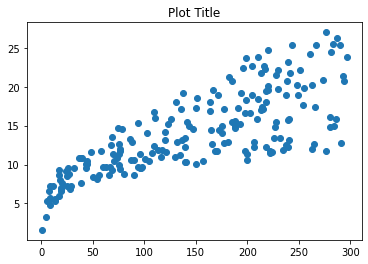

In [33]:
plt.scatter('TV','sales', data=df)
plt.title("Plot Title")

```
np.linalg.inv()
np.transpose()
ndarray.T
```

from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan ,strategy='mean')

df.sample()

In [34]:
import numpy as np

In [38]:
np.sort()

array([228.1,  42.5,  15.2, 149.5, 178.8,   6.7,  55.5, 118.2,   6.6,
       197.8,  64.1, 212.7,  21.8,  95.5, 202.1, 193.4,  65.8, 279.4,
        67.2, 145.3, 216.4, 235.4,  11.2, 226.3,  60.3, 260.9, 140.9,
       238.1, 246.8,  68.6, 290.9, 110.9,  95.2, 263.6,  93.7, 288.7,
       264.9,  72.7,  41.1, 226. , 200.5, 175. , 291.6, 204.9,  23.1,
       173.1,  87.7, 237.9, 225.2,  64.9, 197.8,  98.4, 214.4, 180.6,
       260.7, 196.9,   5.3, 134.2, 208.8, 208.7,  51.5, 259.3, 237.3,
       100.7, 129.1,  67. ,  29.5, 137.3, 235.4, 214.8, 197.1, 107.8,
        24.8, 127.4, 211.4,  14.9,  25.5, 118.5,   3.4, 114. ,  74.4,
       237.8,  73.3,  66.4, 211.5, 191.2,  74.3, 108.7,  86.3, 107.8,
       132.3,  26.6, 215.7, 248.9, 105.4, 161.3, 195.6, 182.9, 287.7,
       133.2, 220.4, 294.4, 278.2, 185.9, 236.2, 135.9,  23. ,  88.4,
        11.1, 253.4, 223.8, 239.7, 173.7, 207.6,  76.2,  73.1, 137.2,
        74.4, 123.7,  17.4, 139.3,  16.8, 222. , 121.1, 227.5,  85.2,
         5.8,  78.2,